In [93]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # image processing
from PIL import Image # image processing
import tensorflow as tf # neural network
tf.random.set_seed(5)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [94]:
# Loading the MNIST datasets
# We get 4 arrays 
# x_train y_train x_test y_test
(x_train,y_train), (x_test,y_test) = mnist.load_data(path='mnist.npz')

In [95]:
# To check if the arrays are in numpy array so in this dataset, image processing and data is already in numpy array if it was not then we have
# to do it by ourselves
type(x_train)

numpy.ndarray

In [96]:
# Shape of the numpy array
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)
# 60000 -> number of images, 28->represent array size and since its greyscale image so no extra data is given

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [97]:
# Training data -> 60000 testing data -> 10000
# Img dimensions 28x28 greyscale image which means it has a single color channel
# Printing the 15th image
print(x_train[16])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  93 164 211 250 250 194  15
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 176 253 237 180 180 243 254 214
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 204 236 135  18   0   0  40 242 252
  126   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  69 253 167   0   0   0   0   

In [98]:
print(x_train[16].shape)

(28, 28)


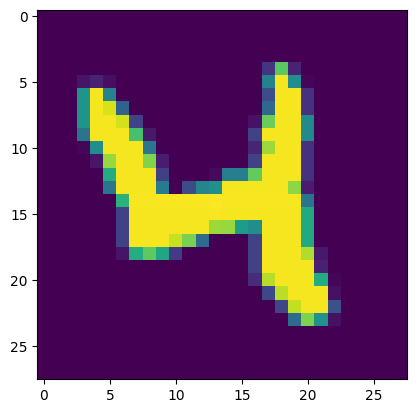

4


In [99]:
# Image display
plt.imshow(x_train[20])
plt.show()

# print the corresponding label
print(y_train[20])

In [100]:
# Image labels

print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [101]:
# Unique values in y_train
print("Unique values in y_train",np.unique(y_train))

print("Unique labels in y_test",np.unique(y_test))

Unique values in y_train [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test [0 1 2 3 4 5 6 7 8 9]


We can use these labels as it is or we can apply One Hot Encoding as well. Remember that all the images are in the same dimension but we didn't have
that then we have to bring it in the same dimensions.

In [102]:
# Scale the values
# Normalizing the data as it will help in better accuracy
x_train = x_train/255
x_test = x_test/255

In [103]:
print(x_train[16])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [104]:
# Building neural network
# Setting some layers for our neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\haide\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
# Compiling the neural network that we have made
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
# Training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8553 - loss: 0.5001
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9560 - loss: 0.1426
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.9705 - loss: 0.0983
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9762 - loss: 0.0771
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.9814 - loss: 0.0621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0513
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9874 - loss: 0.0421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0360
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9907 - loss: 0.0301
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0292


Training data accuracy 0.99

In [107]:
# Accuracy on test data
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9684 - loss: 0.1267
0.9728000164031982


Testing data accuracy is 0.96

In [108]:
print(x_test.shape)

(10000, 28, 28)


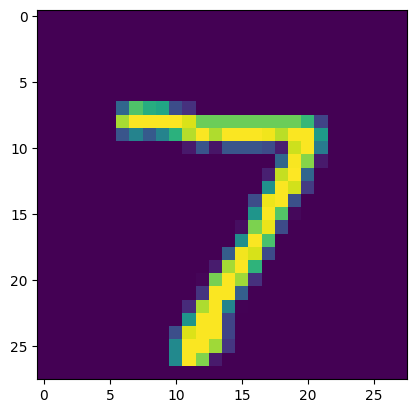

In [109]:
# 1st data in test data in x_test
plt.imshow(x_test[0])

In [110]:
print(y_test[0])

7


In [111]:
# model.predict gives prediction probability of each class for that data point
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


In [112]:
print(y_pred.shape)

(10000, 10)


In [113]:
print(y_pred[0])

[3.9691658e-06 1.0131825e-04 7.3685646e-02 7.1124150e-03 1.0755874e-03
 2.7411625e-01 2.0668521e-11 1.0000000e+00 1.1637667e-02 4.1254982e-01]


In [114]:
# Convert prediction probs to class labels
lebel_for_image_one = np.argmax(y_pred[0])
print(lebel_for_image_one)

7


In [115]:
# Convert predict probs of all the data to class labels
y_lebels = [np.argmax(i) for i in y_pred]
print(y_lebels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [116]:
# Building the confusion matrix for further evaluation
# ********** params **********
# y_test -> true labels (given the dataset)
# y_labels -> predicted labels (by the model)
# ****************************
confuse_matrix = confusion_matrix(y_test,y_lebels)
print(confuse_matrix)

tf.Tensor(
[[ 966    0    0    2    0    1    4    1    3    3]
 [   0 1124    1    3    0    1    2    2    2    0]
 [   5    3  992   12    5    0    2    6    7    0]
 [   0    1    5  980    0    5    0    6    5    8]
 [   1    0    4    0  962    1    4    3    0    7]
 [   3    1    0   10    2  866    4    2    3    1]
 [   3    1    3    1    3    6  937    0    4    0]
 [   1    2    9    2    2    0    0 1005    3    4]
 [   6    2    3    3    7    9    1    4  934    5]
 [   1    3    0    4   24    5    1    7    3  961]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

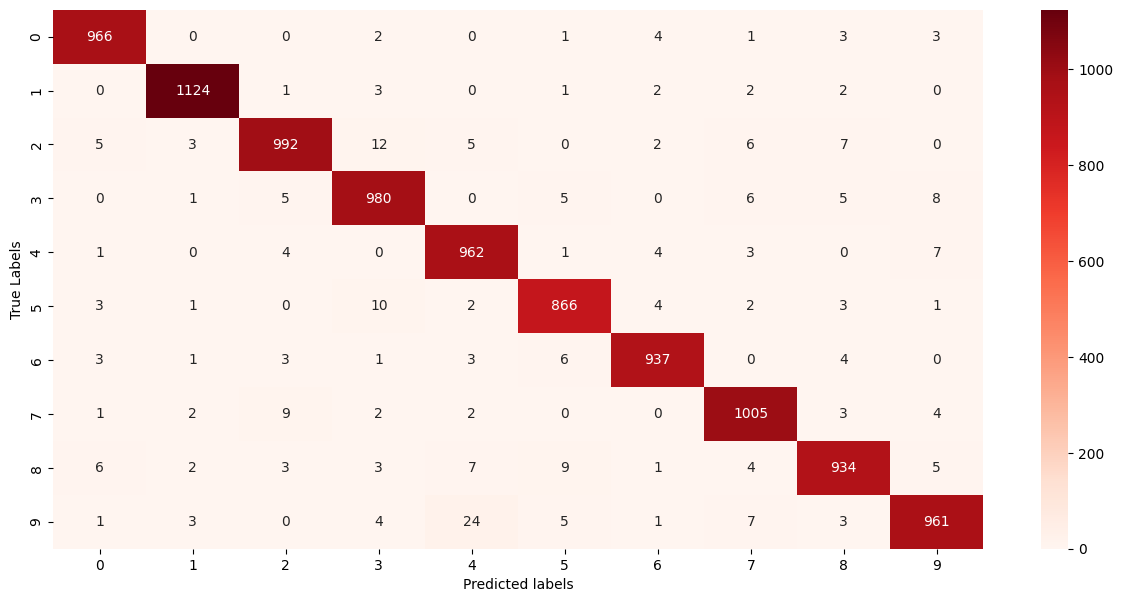

In [117]:
# Heat map
plt.figure(figsize=(15,7))
sns.heatmap(confuse_matrix,annot=True,fmt='d',cmap='Reds') # fmt = 'd' meaning integer values
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

In [118]:
# Giving the image path and saving it in img_path variable
img_path = 'MNIST_digit.png'
input_img = cv2.imread(img_path)


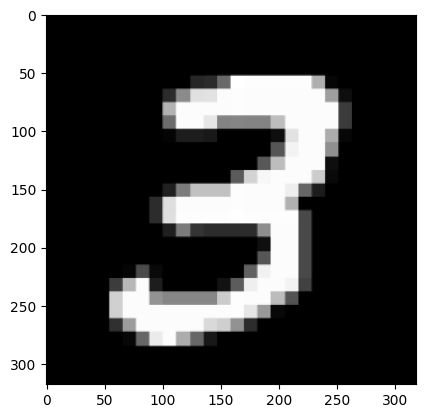

In [119]:
plt.imshow(input_img)

In [120]:
print(input_img.shape)

(318, 318, 3)


As we can see above the image show '3' which means it is being considered as rgb image so first we will convert the image to greyscale and change the dimensions as well

In [121]:
# Conversion of the image to grayscale
grayscale_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [122]:
# Resizing the image to (28,28)
input_img_resize = cv2.resize(grayscale_img,(28,28))

In [123]:
input_img_resize.shape

(28, 28)

In [124]:
# Scaling this image like we did for the dataset
input_img_resize = input_img_resize/255

In [125]:
# Reshaping the image so that we want to tell the neural network that we are giving you 1 image so predict for only 1 image
img_reshaped = np.reshape(input_img_resize, [1,28,28])

In [126]:
# Prediction system by the model
input_pred = model.predict(img_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[5.7877555e-16 2.6416523e-05 3.9563717e-09 1.0000000e+00 3.2799699e-18
  1.2837200e-01 5.8168019e-21 2.8788286e-06 1.7895308e-04 5.4823250e-01]]


In [127]:
input_lebel = np.argmax(input_pred)

In [128]:
# Model has predicted correctly which indeed is 3 as you can see the 3 
print(input_lebel)

3


In [ ]:
# This is the proper predicting system
img_path = input("Path of the image you want to predict")

img_input = cv2.imread(img_path)

plt.imshow(img_input)

gray_scale = cv2.cvtColor(img_input, cv2.COLOR_RGB2GRAY)

img_resize = cv2.resize(gray_scale, (28,28))

img_resize = img_reshaped/255

imgReshaped = np.reshape(img_resize, [1,28,28])

pred = model.predict(imgReshaped)

pred_label = np.argmax(pred)

print("The handwritten digit image is: ", pred_label)